In [1]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from global_import import *
from fm import fama_macbeth_reg_panel_nw

In [8]:
ret_decomp_dcf5 = pd.read_csv(f'{DATA_FOLDER}/decomp_dcf5y_hist_1980_2014.csv', index_col=0).\
                               replace([np.inf, -np.inf], np.nan)

/Users/mmw/Installations/venvs/mlval/lib/python3.7/site-packages/numpy/lib/arraysetops.py:580: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [9]:
ret_decomp_dcf5 = ret_decomp_dcf5[ret_decomp_dcf5.prc>5]
ret_decomp_dcf5 = ret_decomp_dcf5[ret_decomp_dcf5.year<=2014]

In [10]:
monthly_misp = ret_decomp_dcf5.groupby('jdate').agg('mean')

In [11]:
monthly_misp['error36'] = monthly_misp['r_t+36'] - monthly_misp['r*_t+36'] - monthly_misp['r_chg+36'] -monthly_misp['r_unchg+36']

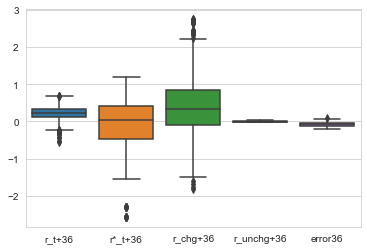

In [12]:
ax = sns.boxplot(data=monthly_misp[["r_t+36",'r*_t+36','r_chg+36', 'r_unchg+36','error36']], dodge=False)
plt.savefig('ret60_retdecomp.png', dpi=300)

In [13]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=monthly_misp.index, y=monthly_misp['r_t+36'], name='r',
                         line=dict(color='black', width=2)))

fig.add_trace(go.Scatter(x=monthly_misp.index, y=monthly_misp['r*_t+36'], name='r*',
                         line=dict(color='crimson', width=2)))

fig.add_trace(go.Scatter(x=monthly_misp.index, y=monthly_misp['r_chg+36'], name='r_chg',
                         line=dict(color='darkblue', width=2)))

fig.update_layout(title='Monthly average future 3-year return components',
                   xaxis_title='Date',
                   yaxis_title='Log returns')

fig.update_layout(
    legend=dict(
        x=0,
        y=1,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=10,
            color="black"
        ),
    )
)

fig.show()

In [26]:
for m in [3, 6, 12, 36, 48, 60]:
    ret_decomp_dcf5['ret'] = ret_decomp_dcf5[f'r_t+{m}'] 
    regdf = ret_decomp_dcf5[['jdate', 'permno', 'ticker', 'ret', 'misp']].replace([np.inf, -np.inf], np.nan).dropna()
    print(f'{m}-Month Return, 5Yr-DCF')
    print(fama_macbeth_reg_panel_nw(regdf, xname='misp'))
    print('')

3-Month Return, 5Yr-DCF
           count      mean  std_error     tstat  std_error_nw  tstat_nw
alpha_i_t  408.0  0.009434   0.004622  2.040861      0.007581  1.244326
misp       408.0 -0.003591   0.000723 -4.964298      0.001097 -3.271800

6-Month Return, 5Yr-DCF
           count      mean  std_error     tstat  std_error_nw  tstat_nw
alpha_i_t  408.0  0.017909   0.006649  2.693628      0.013357  1.340788
misp       408.0 -0.006650   0.000957 -6.948444      0.001898 -3.504147

12-Month Return, 5Yr-DCF
           count      mean  std_error     tstat  std_error_nw  tstat_nw
alpha_i_t  408.0  0.033107   0.008988  3.683430      0.020059  1.650506
misp       408.0 -0.011875   0.001360 -8.728786      0.002974 -3.992457

36-Month Return, 5Yr-DCF
           count      mean  std_error     tstat  std_error_nw  tstat_nw
alpha_i_t  408.0  0.079821   0.012454  6.409338      0.029139  2.739348
misp       408.0 -0.018821   0.002384 -7.895058      0.005532 -3.402099

48-Month Return, 5Yr-DCF
         

In [27]:
for m in [3, 6, 12, 36, 48, 60]:
    ret_decomp_dcf5['ret'] = ret_decomp_dcf5[f'r*_t+{m}']
    regdf = ret_decomp_dcf5[['jdate', 'permno', 'ticker', 'ret', 'misp']].replace([np.inf, -np.inf], np.nan).dropna()
    print(f'{m}-Month Counterfactual Return, 5Yr-DCF')
    print(fama_macbeth_reg_panel_nw(regdf))
    print('')

3-Month Counterfactual Return, 5Yr-DCF
           count      mean  std_error     tstat  std_error_nw  tstat_nw
alpha_i_t  408.0  0.038196   0.009760  3.913385      0.015187  2.515001
misp       408.0  0.020609   0.002991  6.890493      0.004390  4.695035

6-Month Counterfactual Return, 5Yr-DCF
           count      mean  std_error      tstat  std_error_nw  tstat_nw
alpha_i_t  408.0  0.076789   0.013531   5.674933      0.026690  2.877066
misp       408.0  0.041402   0.004003  10.343195      0.007526  5.501384

12-Month Counterfactual Return, 5Yr-DCF
           count      mean  std_error      tstat  std_error_nw  tstat_nw
alpha_i_t  408.0  0.155688   0.018422   8.451266      0.042452  3.667378
misp       408.0  0.083202   0.004970  16.741274      0.011394  7.302245

36-Month Counterfactual Return, 5Yr-DCF
           count      mean  std_error      tstat  std_error_nw   tstat_nw
alpha_i_t  408.0  0.437047   0.028007  15.605012      0.066351   6.586842
misp       408.0  0.169107   0.006325

In [28]:
for m in [3, 6, 12, 36, 48, 60]:
    ret_decomp_dcf5['ret'] = np.exp(ret_decomp_dcf5[f'r_chg+{m}'])-1 # convert log ret to cum ret
    regdf = ret_decomp_dcf5[['jdate', 'permno', 'ticker', 'ret', 'misp']].replace([np.inf, -np.inf], np.nan).dropna()
    print(f'{m}-Month Return due to Change in Misp, 5Yr-DCF')
    print(fama_macbeth_reg_panel_nw(regdf))
    print('')

3-Month Return due to Change in Misp, 5Yr-DCF
           count      mean  std_error     tstat  std_error_nw  tstat_nw
alpha_i_t  408.0  0.026827   0.011577  2.317305      0.017313  1.549561
misp       408.0 -0.179681   0.049041 -3.663922      0.075253 -2.387680

6-Month Return due to Change in Misp, 5Yr-DCF
           count      mean  std_error     tstat  std_error_nw  tstat_nw
alpha_i_t  408.0  0.051991   0.014515  3.581954      0.026179  1.985958
misp       408.0 -0.364200   0.074621 -4.880688      0.146500 -2.486008

12-Month Return due to Change in Misp, 5Yr-DCF
           count      mean  std_error     tstat  std_error_nw  tstat_nw
alpha_i_t  408.0  0.094946   0.020253  4.687940      0.041739  2.274785
misp       408.0 -0.743846   0.104903 -7.090806      0.239594 -3.104616

36-Month Return due to Change in Misp, 5Yr-DCF
           count      mean  std_error     tstat  std_error_nw  tstat_nw
alpha_i_t  408.0 -0.130527   0.108276 -1.205503      0.233775 -0.558344
misp       408.0 -1